In [1]:
## Integrate Jacob's tidied up alignments

seq_blacklist = {}# {'alloascoidea_hylecoeti__OG1299__0_2015'}

In [1]:
%load_ext autoreload
%autoreload 2
import diverse_yeast_tools as dyt

import os
import pickle 
import pandas as pd
import matplotlib.pyplot as plt

from Bio import SeqIO, AlignIO


#from Bio import codonalign

    

# y1000plus_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools/data') + os.sep
# #base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts')


# #Load y1000 species table
# y1000_species = pd.read_csv(y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"), index_col=0)


# orig_genome_lookup = dict(zip(y1000_species['original_genome_id'],y1000_species['old_species_names']))

# base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold')


# spec_abbrev_to_orig = {'Scer': 'Saccharomyces_cerevisiae', 
#                     'Calb': 'Candida_albicans'
#                    }

# gene_id_2_y1000_id = {}

# #Load S.cer lookup table: 
# scer_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/saccharomyces_cerevisiae.csv')
# scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# gene_id_2_y1000_id['Scer'] = dict(zip(scer_lookup.index,scer_lookup['y1000_id']))

# #Load C.alb lookup table
# calb_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/candida_albicans.csv')
# calb_lookup = pd.read_csv(calb_lookup_fname, index_col=0)
# gene_id_2_y1000_id['Calb'] = dict(zip(calb_lookup.index,calb_lookup['y1000_id']))

# #Lookup from swissprot_id to gene_id
# swissprot_id_2_gene_id= {}
# scer_swissprot_id_2_gene_id_df = pd.read_table(base_dir + os.sep + os.path.normpath('msas/structural/Scer_protein_names.tsv'))
# swissprot_id_2_gene_id['Scer'] = dict(zip(scer_swissprot_id_2_gene_id_df['Swiss-Prot'],scer_swissprot_id_2_gene_id_df['OLN']))

# calb_swissprot_id_2_gene_id = pickle.load(open(base_dir + os.sep + os.path.normpath('msas/structural/Mapping_calb.pkl'),"rb"))
# swissprot_id_2_gene_id['Calb'] = dict(zip(calb_swissprot_id_2_gene_id.values(),calb_swissprot_id_2_gene_id.keys()))

base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold')
divyeast_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/diverse_yeast')
y1000plus_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools/data') + os.sep
genomes_dir = os.path.normpath('G:/My Drive/Crick_LMS/external_data/genomes')




In [2]:
#Start with example: CDC19, 'OG1299'
#Open sequence alignment
#Open structural alignment

#Assign Codons to Sequences
#https://jlsteenwyk.com/PhyKIT/usage/index.html#protein-to-nucleotide-alignment

#Need to know which parts of each sequence was trimmed.  (could use clipkit format)
#col1: position in the alignment (starting at 1)
#col2: reports if site was trimmed or kept (trim or keep, respectively)
#col3: reports if the site is parsimony informative or not (PI or nPI, respectively)
#col4: reports the gappyness of the position (number of gaps / entries in alignment)

#I think I might need to do this in a custom way




##Data file: REF_Scer_AF-P00549-F1-model_v2.pkl



In [2]:
#Plot distribution of conservation

struct_analysis = pickle.load(open(base_dir + os.sep + os.path.normpath('Output/data/Analysis_new_02.pkl'), 'rb'))


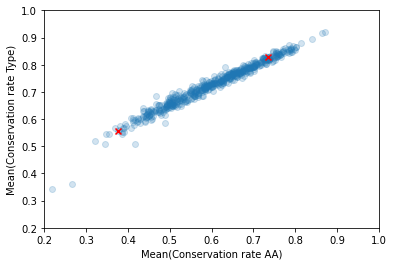

In [3]:
mean_cons_rate_aa = []
mean_cons_rate_type = []
aln_names = []
for aln, aln_data in struct_analysis.items():
    aln_names.append(aln)
    mean_cons_rate_aa.append(aln_data['Mean(Conservation rate AA)'])
    mean_cons_rate_type.append(aln_data['Mean(Conservation rate Type)'])
    
cons_df = pd.DataFrame.from_dict({'Name': aln_names,
                                  'AA': mean_cons_rate_aa,
                                  'Type': mean_cons_rate_type}
                                )

cons_df = cons_df.set_index('Name')

fig, ax = plt.subplots()
ax.scatter(mean_cons_rate_aa, mean_cons_rate_type, alpha = 0.2)

ax.set_xlabel('Mean(Conservation rate AA)')
ax.set_ylabel('Mean(Conservation rate Type)')
ax.set_xlim([0.2,1])
ax.set_ylim([0.2,1])
ax.scatter([0.735859,0.376686],[0.828039, 0.554650],c='red',marker='x')


In [36]:
#cons_df.loc['OG1299_REF_Scer_AF-P00549-F1-model_v2',:]
cons_df.loc['OG1180_REF_Scer_AF-P41903-F1-model_v2',:]


AA      0.376686
Type    0.554650
Name: OG1180_REF_Scer_AF-P41903-F1-model_v2, dtype: float64

In [6]:
cons_df.sort_values('AA')

,AA,Type
Name,,
OG4312_REF_Scer_AF-P38280-F1-model_v2,0.000000,0.000000
OG1380_REF_Scer_AF-Q07732-F1-model_v2,0.000000,0.000000
OG1603_REF_Scer_AF-P25632-F1-model_v2,0.219630,0.341672
OG1060_REF_Scer_AF-P50873-F1-model_v2,0.265574,0.360656
OG1254_REF_Scer_AF-P40395-F1-model_v2,0.322243,0.520691
...,...,...
OG1446_REF_Scer_AF-P41940-F1-model_v2,0.800911,0.864604
OG2968_REF_Scer_AF-P38689-F1-model_v2,0.814038,0.878293
OG1569_REF_Scer_AF-P06168-F1-model_v2,0.840773,0.893593


In [4]:
#For an orthogroup/reference
og_seq_dir = base_dir + os.sep + "og_sequences"

og_pep_dir = og_seq_dir + os.sep + 'proteome' 

#Loop through all structures in that directory
#for og_pep_fname in os.listdir(og_pep_dir):
og_pep_fname =  'OG1299_REF_Scer_AF-P00549-F1-model_v2.pep.fasta'

og_ref_base = og_pep_fname.split('.')[0]
og,ref = og_ref_base.split('_REF_')
struct_data_fname = base_dir + os.sep + os.path.normpath('Output/Summary/REF_' + ref + '.pkl')

og_struct_data = pickle.load(open(struct_data_fname, 'rb'))

In [60]:
## Cycle through this but also make 

#Make Codon Based structural Alignments
#Also make a mapping from the index in the struct data file to the sequence name in order to shorten filenames for CodeML

#For an orthogroup/reference
og_seq_dir = base_dir + os.sep + "og_sequences"

og_pep_dir = og_seq_dir + os.sep + 'proteome' 

#Loop through all structures in that directory
for og_pep_fname in os.listdir(og_pep_dir):
    #og_pep_fname =  'OG1299_REF_Scer_AF-P00549-F1-model_v2.pep.fasta'

    og_ref_base = og_pep_fname.split('.')[0]

    og,ref = og_ref_base.split('_REF_')



    #Load structural alignment

    struct_data_fname = base_dir + os.sep + os.path.normpath('Output/Summary/REF_' + ref + '.pkl')
    struct_aln_cds_fname = base_dir + os.sep + os.path.normpath('msas/structural/fasta_filt_cds/' + og_ref_base + '.struct_filt_cds.fasta')

    og_struct_data = pickle.load(open(struct_data_fname, 'rb'))

    #Extract Protein sequences and build dictionary
    pep_dict = {} 
    pep_fasta = SeqIO.parse(og_pep_dir + os.sep + og_pep_fname, 'fasta')
    for record in pep_fasta:
        pep_dict[record.id] = record.seq

    #Extract Codon Sequences and build dictionary
    cds_dict = {} 
    cds_fasta = SeqIO.parse(og_seq_dir + os.sep + 'cds' + os.sep + og_ref_base + '.cds.fasta', 'fasta')
    for record in cds_fasta:
        cds_dict[record.id] = record.seq


    seq_name_map = {}
    seq_name_map_fname = og_seq_dir + os.sep + 'seq_name_map' + os.sep + og_ref_base + '.tsv'



    with open(struct_aln_cds_fname, 'w') as fout_struct_cds: 
        for seq_ind, name in enumerate(og_struct_data['Molecules'].keys()): 

            seq_name_map[name] = og + '_' + str(seq_ind)

            #seq_pep = pep_dict[name]
            seq_cds = str(cds_dict[name])

            #Extract trimming data
            seq_mapping = og_struct_data['Mapping']['Mapping'][seq_ind]



            line_header = '>' + name + '\n'

            #aa_line = ''
            codon_line = ''
            for aln_ind in seq_mapping: 
                if aln_ind ==-1: 
                    #aa_line = aa_line + '-'
                    codon_line = codon_line + '---'
                else: 
                    #aa_line = aa_line + seq_aa[aln_ind]
                    codon_line = codon_line + seq_cds[3*aln_ind: 3*aln_ind + 3]

            #assert aa_line==struct_aln_aa_dict[seq_aln_id], seq_aln_id + ' msa in filtered structure alignments does not have same alignment as corresponding sequence, ' + name + ', in raw data'

            fout_struct_cds.write(line_header)
            fout_struct_cds.write(codon_line + '\n')


    seq_name_map_ser = pd.Series(seq_name_map, name = 'seq_no')
    seq_name_map_ser.index.name = 'seq_name'
    seq_name_map_ser.to_csv(seq_name_map_fname, sep='\t')

KeyError: 'Calb_AF-A0A1D8PS97-F1-model_v2'

In [53]:
#Use IQTree to make tree for the trimmed file
msa_pep_fname = '/home/heineike/Crick_LMS/projects/diverse_yeasts/alphafold/msas/structural/fasta_filt/OG1299_REF_Scer_AF-P00549-F1-model_v2.struct_filt.fasta.clipkit'
iqtree_command = ["/home/heineike/iqtree-1.6.12-Linux/bin/iqtree", 
                  "-s" , msa_pep_fname,
                  #"-m", 'MF', #only runs model finder 
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", 'Spom_AF-Q10208-F1-model_v2']
print(" ".join(iqtree_command))

#LG+I+G4


/home/heineike/iqtree-1.6.12-Linux/bin/iqtree -s /home/heineike/Crick_LMS/projects/diverse_yeasts/alphafold/msas/structural/fasta_filt/OG1299_REF_Scer_AF-P00549-F1-model_v2.struct_filt.fasta.clipkit -nt AUTO -o Spom_AF-Q10208-F1-model_v2


In [45]:
a

,seq_name,seq_no
0,REF_Scer_AF-P00549-F1-model_v2,0
1,Calb_AF-P46614-F1-model_v2,1
2,REF_Scer_AF-P52489-F1-model_v2,2
3,Spom_AF-Q10208-F1-model_v2,3
4,alloascoidea_hylecoeti__OG1299__0_2015,4
5,alloascoidea_hylecoeti__OG1299__0_6964,5
6,alloascoidea_hylecoeti__OG1299__0_7561,6
7,ascoidea_rubescens__OG1299__6_3105,7
8,ascoidea_rubescens__OG1299__6_5005,8
9,candida_apicola__OG1299__13_3972,9


In [55]:
#Prepare format for CodeML
#Loads MSAs and shortens names, saves in new directory
#shortens names
## do the sequences need to be all caps?  See >OG1299_31 


struct_aln_cds_fname = base_dir + os.sep + os.path.normpath('msas/structural/fasta_filt_cds/' + og_ref_base + '.struct_filt_cds.fasta')
struct_aln_cds_short_fname = base_dir + os.sep + os.path.normpath('msas/structural/fasta_filt_cds_short/' + og_ref_base + '.struct_filt_short_cds.fasta')
seq_name_map_fname = og_seq_dir + os.sep + 'seq_name_map' + os.sep + og_ref_base + '.csv'

og_ref_base = 'OG1299_REF_Scer_AF-P00549-F1-model_v2'
og,ref = og_ref_base.split('_REF_')

#shorten the name of the fasta and build name_replace dictionary
seq_name_map_df = pd.read_csv(seq_name_map_fname, sep='\t')
seq_name_map = dict(zip(seq_name_map_df['seq_name'],seq_name_map_df['seq_no']))

name_replace = {}
#with open(fasta_in,'r') as f_in:
struct_aln_cds_fasta = SeqIO.parse(struct_aln_cds_fname, 'fasta')
with open(struct_aln_cds_short_fname,'w') as f_out: 
    for record in struct_aln_cds_fasta:
        new_id = seq_name_map[record.id] 
        f_out.write('>' + og + '_' + str(new_id) + '\n')
        f_out.write(str(record.seq) + '\n')
        
# fasta_filt = og_dir+os.sep+og+ '_aln_filt.fasta'
# with open(fasta_short,'r') as f_in:
#     with open(fasta_filt,'w') as f_out: 
#         for line in f_in:
#             if (line[0] == '>'):
#                 gene_id = line.split('>')[1].strip()
#                 #print(genes_to_rm)
#                 #print(gene_id in genes_to_rm)
#                 if gene_id in genes_to_rm:
#                     next(f_in)  #skips the sequence line as well
#                 else: 
#                     f_out.write(line)
#             else: 
#                 f_out.write(line)




KeyError: 'seq_name'

In [26]:
# #Make Codon Based structural Alignments: 


# #For an orthogroup/reference
# struct_aln_aa_dir = base_dir + os.sep + os.path.normpath("msas/structural/fasta_renamed_struct_filt") + os.sep

# #Loop through all structures in that directory
# struct_aln_aa_fname_base =  'OG1299__Scer_AF-P00549-F1-model_v2.struct_filt.fasta'
# struct_aln_aa_fname =  struct_aln_aa_dir + struct_aln_aa_fname_base #Use this as a filter for the structures to keep, also use to check aa alignment

# struct_aln_aa = AlignIO.read(struct_aln_aa_fname, 'fasta')

# struct_aln_aa_dict = {}
# for record in struct_aln_aa:
#     struct_aln_aa_dict[record.id] = str(record.seq)


# (og,ref_ext) = struct_aln_aa_fname_base.split('__')
# (ref, ext1,ext2) = ref_ext.split('.')

# struct_aln_codon_fname =  base_dir + os.sep + os.path.normpath("msas/structural/fasta_renamed_struct_filt_codon/" + og + '__' + ref + '_struct_filt_codon.fasta')

# struct_data_fname = base_dir + os.sep + os.path.normpath('/Output/Summary/REF_' + ref + '.pkl')

# og_struct_data = pickle.load(open(struct_data_fname, 'rb'))

# seq_aln_aa_fname = base_dir + os.sep + os.path.normpath("msas\ogs_pep_aligned\\" + og + '.mfaa.mafft' )
# seq_aln_codon_fname = base_dir + os.sep + os.path.normpath("msas\ogs_cds_threaded\\" + og + '.mfna.threaded' )

# seq_aln_aa = AlignIO.read(seq_aln_aa_fname, 'fasta')
# seq_aln_aa_inds = {}

# for jj, record in enumerate(seq_aln_aa):
#      seq_aln_aa_inds[record.id] = jj
    
# seq_aln_codon = AlignIO.read(seq_aln_codon_fname, 'fasta')
# seq_aln_codon_inds = {}

# for jj, record in enumerate(seq_aln_codon):
#      seq_aln_codon_inds[record.id] = jj
    


# #For each sequence
# with open(struct_aln_codon_fname, 'w') as fout_struct_codon: 
#     for seq_ind, name in enumerate(og_struct_data['Molecules'].keys()): 
#         # seq_ind = 7
#         # name = 'ascoidea_rubescens__OG1299__6_3105'
#         spec_abbrev_test = name.split('_')[0]
#         seq_keep = True
#         if name in seq_blacklist:  #Make sure I am using Jacob's most recent sequence alignments
#             seq_keep=False
            
#         if spec_abbrev_test in {'REF', 'Spom', 'Calb'}: #it is never Scer as REF refers to the fact that we are using Scer as the reference species. 
#             if spec_abbrev_test == 'REF': 
#                 spec_abbrev = 'Scer'
#                 name = '_'.join(name.split('_')[1:]) # removes 'REF_' from the beginning of the name
#             else: 
#                 spec_abbrev = spec_abbrev_test 

#             if spec_abbrev == 'Spom': 
#                 seq_keep = False
#             else: 
#                 spec_old = spec_abbrev_to_orig[spec_abbrev]

#                 swissprot_id = name.split('_')[1].split('-')[1]
#                 y1000_id = gene_id_2_y1000_id[spec_abbrev][swissprot_id_2_gene_id[spec_abbrev][swissprot_id]]

#         else: 
#             (spec, og_name, y1000_id) = name.split('__')
#             spec_old = orig_genome_lookup[spec] 

#         if seq_keep: 
#             seq_aln_id = spec_old + '|' + y1000_id
#             if seq_aln_id in struct_aln_aa_dict.keys():  #Only included if it is part of Oliver's structural alignment
#                 #Extract protein sequence
#                 seq_aa_gaps = seq_aln_aa[seq_aln_aa_inds[seq_aln_id]].seq
#                 seq_aa = seq_squeeze(seq_aa_gaps)

#                 #Extract codon sequenc
#                 seq_codon_gaps = seq_aln_codon[seq_aln_codon_inds[seq_aln_id]].seq
#                 seq_codon = seq_squeeze(seq_codon_gaps)

#                 #Extract trimming data
#                 seq_mapping = og_struct_data['Mapping']['Mapping'][seq_ind]

#                 #Make aa_line and codon_line

#                 line_header = '>' + seq_aln_id + '\n'

#                 aa_line = ''
#                 codon_line = ''
#                 for aln_ind in seq_mapping: 
#                     if aln_ind ==-1: 
#                         aa_line = aa_line + '-'
#                         codon_line = codon_line + '---'
#                     else: 
#                         aa_line = aa_line + seq_aa[aln_ind]
#                         codon_line = codon_line + seq_codon[3*aln_ind: 3*aln_ind + 3]
                
#                 assert aa_line==struct_aln_aa_dict[seq_aln_id], seq_aln_id + ' msa in filtered structure alignments does not have same alignment as corresponding sequence, ' + name + ', in raw data'
                   
#                 fout_struct_codon.write(line_header)
#                 fout_struct_codon.write(codon_line + '\n')
                


In [ ]:
# Prepare to Run CodeML
# Convert codon alignment to phylip, shorten names

# Get a tree (prune to only have correct leaves, use short names)

# Build codeml run file, set up input/output directories

In [ ]:
codeml_input = [('seqfile', 'OG1299_cds_aln.phy'), 
                ('treefile', 'OG1299_clean.treefile'), 
                ('outfile', 'pamlOne.out'), 
                ('noisy', '9'), #0,1,2,3,9: how much rubbish on the screen
                ('verbose', '1'), # 0: concise; 1: detailed, 2: too much
                ('runmode', '0'), #user tree
                ('seqtype', '1'), #Codons
                ('CodonFreq', '2'), #0:1/61 each, 1:F1X4, 2:F3X4, 3:codon table 
                ('clock', '0'), # No clock - rates vary from branch to branch
                ('model', '0'), #How many omegas estimated 0: 1, 1: one per branch,  2: 2 or more - need to specify branches 
                ('NSsites', '0'), #one
                ('icode', '0'), # universal code.  Yeast mitochondria is 3, Alternative yeast nuclear should be 12, but the doc says 8.
                ('fix_kappa', '0'), #Uses Kappa estimate as initial guess
                ('kappa', '2'), 
                ('fix_omega', '0'), 
                ('omega', '1'), # initial or fixed omega - for codons or codon based AAs - default is 0.4
                ('fix_alpha', '1'), # setting this along with NSsites and alpha=0 below means that NSsites is used
                ('alpha', '.0'),   #why .0 instead of 0?
                ('Malpha', '0'),  #one gamma distribution across all sites
                ('ncatG', '10'),  #Number of categories in dG of NSsites models - default is 3
                ('getSE', '0'),   #get standard errors of estimates
                ('RateAncestor', '1'),  #Ancestral state - default is 0
                ('method', '0'), #simultaneous
                ('cleandata', '1'), #remove sites with ambiguity data - yes (default is no)
                ('Small_Diff', '.5e-6')  #Use a value between 1e-8 and 1e-5 and check that the results are not sensitive to the value used.
               ]

for (param_name, param_val) in 

In [ ]:
#function: run codeML given a codon alignment, output into file

In [ ]:
#function: #Extract relevant information from CodeML file
#Overall Ev Rate

In [ ]:
#Compare Ev Rate for seq alignment, structural alignment, all structurally conserved regions, sub-network

'ATGGTGGCCAACGGATACCACCATAAACTGAGCCAGCGTCTGAGCCAGCGTCTGAGCCAGCGTCTGAGCCGATCAGGATTCTGGACCAGCACGACTGCCCCGAGCCAGCCATTCAATCCAGCACTTCCAGTCCTCTTAAAGCCAGTATGTTTCCTCCCCAACTTTATTATTTCTTTTTATTTTCCCCCCCCAAAAAAACAAAAAAACCACAAAACCATGTCTGTTCTTGATGATGCTAACTTCCCCTCGATGGAGATGTTTTTCGAACGGTACGGTGATGACGGGGTCCAGGAACCCCGAGACGAACATTACATGCTGCATGAGGAATACGAGGAGACGTACGCAGCGCAATTTAGCTACGAATTCGGGCTGACTAAAGACACCAAGCTCCGTGATGTGTCCGAAACACCCATCAACTATGATGTCAGTGATTACTACTTTGACCCCCAGCTAGGGTTGGGCATCCACAAGGAGATCGGACTTGTGGTGGTGTTCCACCGAGACCCCCGGAAAAACTATATCATCCGGTCGCTTTTATTTGAGAGGTACGCACAGGCCATCATGTGCAAGATAACACTGTTCCGCGGGGCCTTGCAGTTGCTGCGGGCCAAGGACGAGCTCAGTCTGAAGCTTGTGCTCAGTTGCGAGATGGGTGAGCCAGGACTCGAACACGCCCGCGGCAAGCTCAGTCCGCAATGCATGCCGCTCCAGGCCGTGCCCATCCACTTTGGTTTTGGCTGCGGCTGCGGCATCATCAGAAGAAGGTATGGCGAGTTGAGTCGCCACTCATGCATCCAACGGGACTCGATCCGACCCATGGCGTTCCAAAAGTTCCCGCAGAGGTATGGTCTCCGGCCTGCCAACTTTGAGGTTTATTGTCCCACCGACGACGGCTATGTGGAGGCCCGCGCCAGGGATGGTCCTGCGTCGTCGTCGTCGTCGTCGTCGTCGTCGTCATTATCAGGGACTGCGACAACCGTCCAGAACCACCTGCGGACA

OrderedDict([('transl_table', ['12']),
             ('locus_tag', ['DEHA2G00110g']),
             ('old_locus_tag',
              ['DEHA0G00110g', 'DEHA-IPF1099', 'DEHA-CDS0121.1']),
             ('product', ['DEHA2G00110p']),
             ('note', ['no similarity']),
             ('db_xref',
              ['EnsemblGenomes-Gn:DEHA2G00110g',
               'EnsemblGenomes-Tr:CAG89967',
               'UniProtKB/TrEMBL:Q6BJT8']),
             ('protein_id', ['CAG89967.2']),
             ('translation',
              ['MVANGYHHKSSQRSSQRSSQRSSRSGFWTSTTAPSQPFNPALPVLLKPVCFLPNFIISFYFPPPKKQKNHKTMSVLDDANFPSMEMFFERYGDDGVQEPRDEHYMSHEEYEETYAAQFSYEFGSTKDTKLRDVSETPINYDVSDYYFDPQLGLGIHKEIGLVVVFHRDPRKNYIIRSLLFERYAQAIMCKITSFRGALQLSRAKDELSSKLVLSCEMGEPGLEHARGKLSPQCMPLQAVPIHFGFGCGCGIIRRRYGELSRHSCIQRDSIRPMAFQKFPQRYGLRPANFEVYCPTDDGYVEARARDGPASSSSSSSSSSLSGTATTVQNHSRTTTVPDSQHHPLVKKILQEVDREIVDIQVKGMKEANFVPKIAQLLVGAMTLFSANINHVNLAGLEVVRLFKGAANNTGRASNNFNRRPSTYFRAVQTYSTCVQYSKYMAELVYMVLMYGPKPAASLALTEMLDKYRDDEVVLEVNS

CR382133.2
CR382134.2
CR382135.2
CR382136.2
CR382137.2
CR382138.2
CR382139.2


Toni noticed positive selection in C385 from the trimmed alignment (third codon of V157) has a signature of positive selection in CDC19 (OG1299_REF_Scer_AF-P00549-F1-model_v2).  This was the PamlBSA run This is how I figured out which residue.

ATT GGT ACC ATC GGT CCA AAG ACC AAC AAC CCA GAA ACC TTG GTT GCT TTG AGA AAG GCT GGT TTG AAC ATT GTC CGT ATG AAC TTC TCT CAC GGT TCT TAC GAA TAC CAC AAG TCT GTC ATT GAC AAC GCC AGA AAG TCC GAA GAA TTG CCA AGA CCA TTG GCC ATT GCT TTG GAC ACC AAG GGT CCA GAA ATC AGA ACT GGT ACC ACC ACC GTT GAC TAC CCA ATC CCA CCA AAC GAA ATG ATC TTC ACC ACC GAT GAC AAG TAC GCT AAG TGT GAC GAC AAG ATC ATG TAC GTT GAC TAC AAG AAC ATC ACC AAG GTC ATC TCC GCT GGT AGA ATC ATC TAC GTT GAT GAT GGT GTT TTG TCT TTC CAA GTT TTG GAA GTC GTT GAC GAC AAG ACT TTG AAG GTC AAG GCT TTG AAC GCC GGT TGT TCC CAC AAG GGT GTC AAC TTA CCA GGT ACC GAT GTC GAT TTG CCA TTG TCT GAA AAG GAC AAG GAA GAT TTG AGA TTC GGT GTC AAG AAC GGT GTC CAC ATG GTC TTC GCT TCT ATC AGA ACC GCC AAC GAT GTT TTG ACC ATC AGA GAA GTC TTG GGT AAG GAC GTC AAG ATT GTC AAG ATT GAA AAC CAA CAA GGT GTT AAC AAC TTC GAC GAA ATC TTG AAG GTC ACT GAC GGT GTT ATG GTT GCC AGA GGT GAC TTG GGT ATT GAA ATC CCA GCC CCA GAA GTC TTG GCT GTC CAA AAG AAA TTG ATT GCT AAG TCT AAC TTG GCT GGT AAG CCA GTT ATC TGT GCT ACC CAA ATG TTG GAA TCC ATG ACT TAC AAC CCA AGA CCA ACC AGA GCT GAA GTT TCC GAT GTC GGT AAC GCT ATC TTG GAT GGT GCT GAC TGT GTT ATG TTG TCT GGT GAA ACC GCC AAG GGT AAC TAC CCA ATC AAC GCC GTT ACC ACT ATG GCT GAA ACC GCT GTC ATT GCT GAA CAA GCT ATC GCT TAC TTG CCA AAC TAC GAT GAC ATG AGA AAC TGT ACC TCC ACC ACC GAA ACC GTC GCT GCC TCC GCT GTC GCT GCT GTT TTC GAA CAA AAG GCC AAG GCT ATC ATT GTC TTG TCC ACT TCC GGT ACC ACC CCA AGA TTG GTT TCC AAG TAC AGA CCA AAC TGT CCA ATC ATC TTG GTT ACC AGA TGC CCA AGA GCT GCT AGA TTC TCT CAC TTG TAC AGA GGT GTC TTC CCA TTC GTT TTC GAA AAG 
385/3 = 128.333
128*4 = 512

GTC GTT GAC GAC AAG ACT TTG AAG
VVDDKT
V157?